In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)

X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(random_state=42, max_depth=2)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names = iris.target_names,
    rounded=True,
    filled=True
)

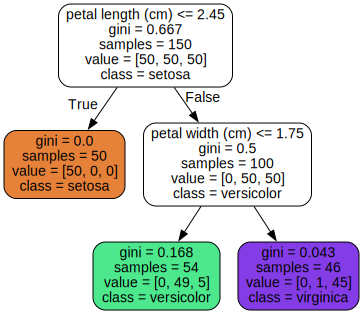

In [3]:
from graphviz import Source

Source.from_file("iris_tree.dot")

In [4]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [5]:
tree_clf.predict([[5,1.5]])

array([1])

In [6]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

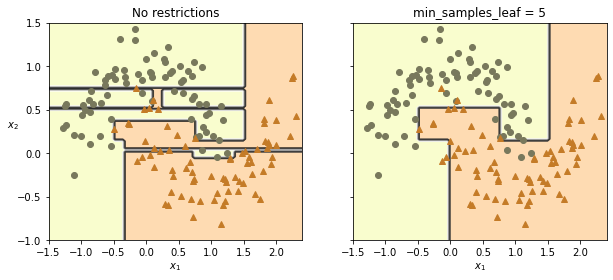

In [7]:
import matplotlib.pyplot as plt
import numpy as np 


def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

In [8]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

print(tree_clf1.score(X_moons_test, y_moons_test))
tree_clf2.score(X_moons_test, y_moons_test)

0.898


0.92

In [9]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200,1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

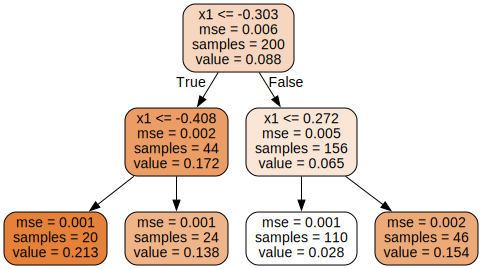

In [10]:
export_graphviz(
    tree_reg,
    out_file="regression_decision_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)

Source.from_file("regression_decision_tree.dot")

In [11]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

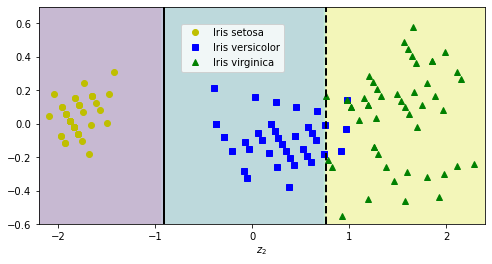

In [12]:
plt.figure(figsize=(8,4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(
    np.linspace(axes[0], axes[1],100),
    np.linspace(axes[2], axes[3],100))

X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th1, th2 = tree_clf_pca.tree_.threshold[[0,2]]
plt.xlabel("$z_1$")
plt.xlabel("$z_2$")
plt.plot([th1,th1], axes[2:], "k-", linewidth=2)
plt.plot([th2,th2], axes[2:], "k--",linewidth=2)

plt.axis(axes)
plt.legend(loc=(0.32, 0.7))

In [13]:
tree_clf_pca.tree_.threshold

array([-0.9111246 , -2.        ,  0.75787246, -2.        , -2.        ])

# Testing some more decision trees here #

In [17]:
from sklearn.model_selection import train_test_split

X_moons, y_moons = make_moons(n_samples=10_000, noise = 0.4, random_state=42)

X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

In [20]:
from sklearn.model_selection import GridSearchCV
params = [
    {'max_leaf_nodes': list(range(2, 100)),
     'min_samples_split': list(range(2,5)),
     'max_depth': list(range(2,7))}
]

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=3)

grid_search_cv.fit(X_moons_train, y_moons_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19, 20, 21,
                                             22, 23, 24, 25, 26, 27, 28, 29, 30,
                                             31, ...],
                          'min_samples_split': [2, 3, 4]}])

In [22]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_moons_test)
accuracy_score(y_moons_test, y_pred)

0.8595

In [33]:
from sklearn.model_selection import ShuffleSplit
train_instances = 100
n_trees = 1_000
moon_100_sets = []
tree_shuffle = ShuffleSplit(n_splits=n_trees, test_size=len(X_moons_train) - train_instances, random_state=42)
for train_100_indx, test_n_indx in tree_shuffle.split(X_moons_train):
    X_100_train = X_moons_train[train_100_indx]
    y_100_train = y_moons_train[train_100_indx]
    moon_100_sets.append([X_100_train, y_100_train])

In [36]:
from sklearn.base import clone
import numpy as np
forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_100, y_100) in zip(forest, moon_100_sets):
    tree.fit(X_100, y_100)
    y_pred = tree.predict(X_moons_test)
    accuracy_scores.append(accuracy_score(y_moons_test, y_pred))

np.mean(accuracy_scores)

0.805671

In [43]:
from scipy.stats import mode

y_pred = np.empty([n_trees, len(X_moons_test)], dtype=np.uint8)

for tree_indx, tree in enumerate(forest):
    y_pred[tree_indx] = tree.predict(X_moons_test)

In [59]:
y_pred_mode, count = mode(y_pred, axis=0)
print(y_pred_mode)
print(count)

[[1 1 0 ... 0 0 0]]
[[949 908 963 ... 918 993 615]]


In [53]:
accuracy_score(y_moons_test, y_pred_mode.reshape([-1]))

0.873